In [120]:
%load_ext lab_black
import pandas as pd
import json
import requests
import numpy as np
from config import weather_api_key
from config import g_key
from citipy import citipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


# Part I : WeatherPy
----


## Generate Cities List

In [2]:
lat_range = (90, -90)
lon_range = (180, -180)

# Blank list to hold latitude and longitude values
lat_lon = []

# Using numpy to generate random latitude and longitude values
lat = np.random.uniform(high=90, low =-90, size= 1400)
lon = np.random.uniform(high=180, low =-180, size= 1400)
lat_lon = list(zip(lat, lon))

# Using "for" loop to generate city list.
city_list = []

for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

# Appending only non-duplicated names to the city list.
    if city not in city_list:
        city_list.append(city)

In [3]:
len(city_list)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


url = "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"
parameters = {
    "q": city_list,
    "appid": weather_api_key
}

In [4]:
r = requests.get("http://api.openweathermap.org/data/2.5/weather", params={
        "q": city_list[50],
        "appid": weather_api_key})

In [5]:
data = r.json()
data

{'coord': {'lon': -45.96, 'lat': -2.04},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 299.13,
  'feels_like': 303.01,
  'temp_min': 299.13,
  'temp_max': 299.13,
  'pressure': 1011,
  'humidity': 84,
  'sea_level': 1011,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 2, 'deg': 63},
 'clouds': {'all': 96},
 'dt': 1600721957,
 'sys': {'country': 'BR', 'sunrise': 1600678412, 'sunset': 1600722003},
 'timezone': -10800,
 'id': 3395497,
 'name': 'Maracaçumé',
 'cod': 200}

In [6]:
def extract_data(data):
    return {
        "City": data["name"],
        "Lat": data["coord"]["lat"],
        "Lon": data["coord"]["lon"],
        "Max Temp": data ["main"]["temp_max"],
        "Humidity": data ["main"]["humidity"],
        "Cloudiness": data ["clouds"]["all"],
        "Wind Speed": data ["wind"]["speed"],
        "Country": data["sys"]["country"],
        "Date": data["dt"]
    }
    

In [7]:
city_results = []

In [8]:
# Record counter starts at 1
processing_record = 1

print("Beginning Data Retrieval")
print("----------------------------------------")

for city in city_list:
      
    try:
        data = requests.get("http://api.openweathermap.org/data/2.5/weather", params={
        "q": city,
        "appid": weather_api_key, 
        "units": "imperial"
        }).json()
        
        city_result = extract_data(data)
        city_results.append(city_result)
        
        processing_record += 1
    
        print("Processing Record {processing_record} | {city}")
                            
    except:
        print("City not found. Skipping...")
    continue
    
print("----------------------------------------")
print("Data Retrieval Complete")
print("----------------------------------------")
    

Beginning Data Retrieval
----------------------------------------
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {city}
Processing Record {processing_record} | {

In [9]:
df = pd.DataFrame(city_results)
df.head(2)

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8,-68.30,50.00,57,75,3.56,AR,1600721730
1,Kutum,14.2,24.67,84.76,26,86,12.06,SD,1600721958


### Creating Scatter Plot to showcase the relation ship between Max Temperature and Latitude

In [10]:
# Converting data in DataFrame so that it can be used to define the X and y value needed for the scatter plot.
X = df["Lat"].values
y = df["Max Temp"].values

<function matplotlib.pyplot.show(close=None, block=None)>

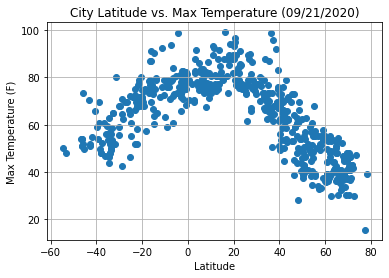

In [11]:
plt.title("City Latitude vs. Max Temperature (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(X,y)
plt.show

Here we are examining the relationship between a city's latitude and it's maximum temperature. As you can see, as a city's latitude has a clear relationship to it's max temperature as we would expect. Temperatures appear to be higher the closer they are to the equator, (0) degrees latitude.

### Creating Scatter Plot to showcase the relationship between Humidity and Latitude 

In [12]:
X = df["Lat"].values
y = df["Humidity"].values

<function matplotlib.pyplot.show(close=None, block=None)>

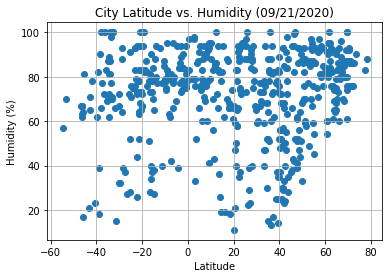

In [13]:
plt.title("City Latitude vs. Humidity (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.scatter(X,y)
plt.show

This scatter plot is displaying the relationship between a city's latitude and it's humidity levels. There does not appear to be a clear relationship between cities with higher humidities and their latitude based on the plot. However, there does appear to be an indication that many cities that lie between around -30 degrees and 35 degrees latitude have lower humidity levels. There are basically no cities outside of that range that have humidity levels below 20%.

In [14]:
X = df["Lat"].values
y = df["Cloudiness"].values

<function matplotlib.pyplot.show(close=None, block=None)>

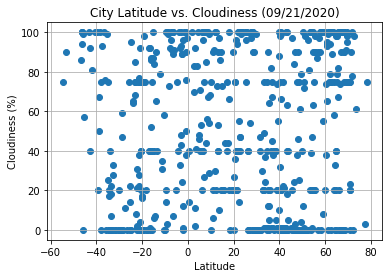

In [15]:
plt.title("City Latitude vs. Cloudiness (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.scatter(X,y)
plt.show

This scatter plot showcases the relationship between a cities latitude and its cloud cover. Latitude does not appear to be a major impactor of a city's cloud cover. Cities with high, medium and low cloud cover appear to be evenly distributed across all latitudes.

In [16]:
X = df["Lat"].values
y = df["Wind Speed"].values

<function matplotlib.pyplot.show(close=None, block=None)>

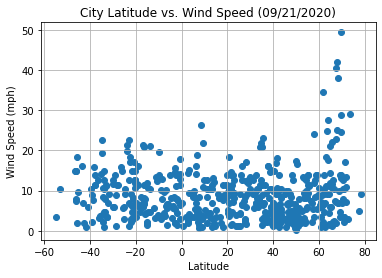

In [17]:
plt.title("City Latitude vs. Wind Speed (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(X,y)
plt.show

With this plot, we can see that there is perhaps a small relationship between a city's latitude and it wind speed. Although wind speed does appear to be rather equally distibuted, we do see that cities further away from the equator have the potential for higher wind speeds. If you'll notice, there are a slightly higher number of cities with latitudes further away from the equator reporting higher windspeeds.

## Linear Regression

### Temperature (F) vs. Latitude (Northern and Southern Hemisphere)

#### (Northern Hemisphere)

In [18]:
# Created dataframe to display only those cities located in the Northern Hemisphere
NH_df = df[df.Lat > 0]

In [19]:
# Converting the NH_df data so that it can be used to create scatter plots andn perform linear regression.
X = NH_df["Lat"].values
X_array = [[e] for e in X]
y = NH_df["Max Temp"].values

In [20]:
#Setting up linear regression model.
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [21]:
slope = model.coef_[0]
slope

-0.7414114027201512

In [22]:
intercept = model.intercept_
intercept

92.56470502779814

In [23]:
r_squared = model.score(X_array, y)
r_squared

0.7283760117284195

In [24]:
def predict_function(max_temp):
    return model.predict([[max_temp]])[0]

In [25]:
max_temp_range = np.arange(min(X), max(X), 0.001)
predict_max_temp = [predict_function(e) for e in max_temp_range]

In [26]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

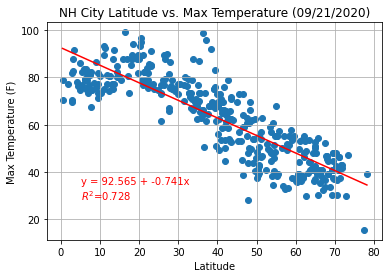

In [27]:
plt.title("NH City Latitude vs. Max Temperature (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(X,y)
plt.plot(max_temp_range, predict_max_temp, color="red")
plt.text(5,35, formula, color="red")
plt.text(5,28, r_squared_str, color="red")
plt.show

As you can see, the r squared value for this regression anaylis is quite high. This indicates that there is a strong correlation between latitude and the maximum temperatures. This is easily seen on the plot displayed above. The further you get away from the equator (0), the lower the max temperature.

#### (Southern Hemisphere)

In [28]:
# Created dataframe to display only those cities located in the Northern Hemisphere
SH_df = df[df.Lat < 0]

In [29]:
# Converting the SH_df data so that it can be used to create scatter plots andn perform linear regression.
X = SH_df["Lat"].values
X_array = [[e] for e in X]
y = SH_df["Max Temp"].values

In [30]:
#Setting up linear regression model.
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [31]:
slope = model.coef_[0]
slope

0.6372238522849714

In [32]:
intercept = model.intercept_
intercept

81.61256496997254

In [33]:
r_squared = model.score(X_array, y)
r_squared

0.530430161085919

In [34]:
def predict_function(max_temp):
    return model.predict([[max_temp]])[0]

In [35]:
max_temp_range = np.arange(min(X), max(X), 0.001)
predict_max_temp = [predict_function(e) for e in max_temp_range]

In [36]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

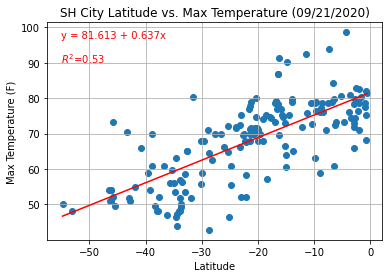

In [37]:
plt.title("SH City Latitude vs. Max Temperature (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(X,y)
plt.plot(max_temp_range, predict_max_temp, color="red")
plt.text(-55,97, formula, color="red")
plt.text(-55,90, r_squared_str, color="red")
plt.show

The r squared value for this linear regression is also quite high; although not quite as high as what was indicated in the Northern Hemisphere. Again, there is a strong correlation between latitude and maximum temperature in the Southern Hemisphere as well. This is easily explained by the fact that Earth is round, and as you get further and further away from the equator in both hemispheres, less of the sun's light makes it to the surface causing maximum temperatures to be lower. Yet another notch against the "Flat Earthers" out there.

### Humidity (%) vs. Latitude (Northern and Southern Hemisphere)¶

#### (Northern Hemisphere)

In [38]:
X = NH_df["Lat"].values
X_array = [[e] for e in X]
y = NH_df["Humidity"].values

In [39]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [40]:
slope = model.coef_[0]
slope

0.13979851643335645

In [41]:
intercept = model.intercept_
intercept

66.05602294847438

In [42]:
r_squared = model.score(X_array, y)
r_squared

0.018297489459965566

In [43]:
def predict_function(humidity):
    return model.predict([[humidity]])[0]

In [44]:
humidity_range = np.arange(min(X), max(X), 0.001)
predict_humidity = [predict_function(e) for e in humidity_range]

In [45]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

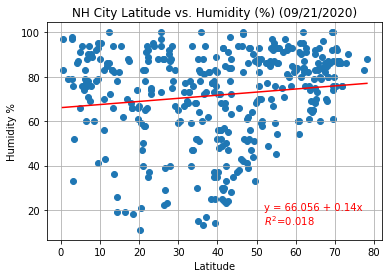

In [46]:
plt.title("NH City Latitude vs. Humidity (%) (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.scatter(X,y)
plt.plot(humidity_range, predict_humidity, color="red")
plt.text(52,20, formula, color="red")
plt.text(52,13, r_squared_str, color="red")
plt.show

The r squared value for this linear regression is quite low suggesting that there is little correlation between latitude and humidity levels. However, as I mentioned above, one can still see there is still something going on here. Although humidity levels due appear to be dispearsed throughout, you can still see that most of the lower humidit levels are grouped together between about 10 and 35 degrees latitude.

#### (Southern Hemisphere)

In [47]:
X = SH_df["Lat"].values
X_array = [[e] for e in X]
y = SH_df["Humidity"].values

In [48]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [49]:
slope = model.coef_[0]
slope

0.32664703884703505

In [50]:
intercept = model.intercept_
intercept

78.91964590539393

In [51]:
r_squared = model.score(X_array, y)
r_squared

0.04962000272137257

In [52]:
def predict_function(humidity):
    return model.predict([[humidity]])[0]

In [53]:
humidity_range = np.arange(min(X), max(X), 0.001)
predict_humidity = [predict_function(e) for e in humidity_range]

In [54]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

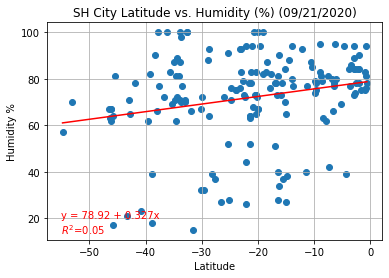

In [55]:
plt.title("SH City Latitude vs. Humidity (%) (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.scatter(X,y)
plt.plot(humidity_range, predict_humidity, color="red")
plt.text(-55,20, formula, color="red")
plt.text(-55,13, r_squared_str, color="red")
plt.show

The same is true for the Southern Hemisphere. The r squared value for this linear regression is also low suggesting that there is little correlation between latitude and humidity levels. Again; however, we do see there is still something going on with lower humidity levels. Although humidity levels as whole due appear to be dispearsed throughout, you can still see that most of the lower humidit levels are grouped together between about -25 and -10 degrees latitude. One would assume that most deserts are located at this latitudal levels all over the planet.

### Cloudiness (%) vs. Latitude (Northern and Southern Hemisphere)¶

#### (Northern Hemisphere)

In [56]:
X = NH_df["Lat"].values
X_array = [[e] for e in X]
y = NH_df["Cloudiness"].values

In [57]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [58]:
slope = model.coef_[0]
slope

0.03910754533050946

In [59]:
intercept = model.intercept_
intercept

47.478302165877196

In [60]:
r_squared = model.score(X_array, y)
r_squared

0.0004067754377502508

In [61]:
def predict_function(cloudiness):
    return model.predict([[cloudiness]])[0]

In [62]:
cloudiness_range = np.arange(min(X), max(X), 0.001)
predict_cloudiness = [predict_function(e) for e in cloudiness_range]

In [63]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

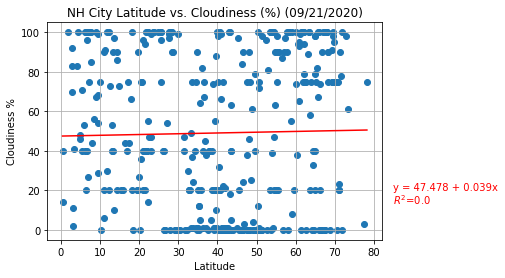

In [64]:
plt.title("NH City Latitude vs. Cloudiness (%) (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.scatter(X,y)
plt.plot(cloudiness_range, predict_cloudiness, color="red")
plt.text(85,20, formula, color="red")
plt.text(85,13, r_squared_str, color="red")
plt.show

The R squared value for this linear regression is the lowest we've seen so far. There is apparently little to know correlation betwen cloudiness and latitude in the Northern Hemisphere.

#### (Southern Hemisphere)

In [65]:
X = SH_df["Lat"].values
X_array = [[e] for e in X]
y = SH_df["Cloudiness"].values

In [66]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [67]:
slope = model.coef_[0]
slope

0.2575411499670345

In [68]:
intercept = model.intercept_
intercept

54.49635067150396

In [69]:
r_squared = model.score(X_array, y)
r_squared

0.007921102721943019

In [70]:
def predict_function(cloudiness):
    return model.predict([[cloudiness]])[0]

In [71]:
cloudiness_range = np.arange(min(X), max(X), 0.001)
predict_cloudiness = [predict_function(e) for e in cloudiness_range]

In [72]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

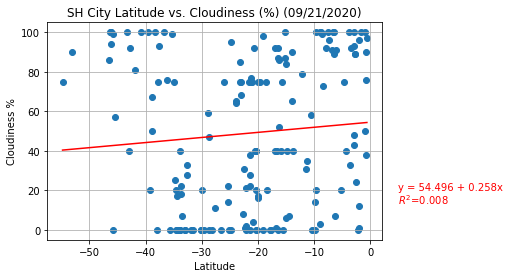

In [73]:
plt.title("SH City Latitude vs. Cloudiness (%) (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.scatter(X,y)
plt.plot(cloudiness_range, predict_cloudiness, color="red")
plt.text(5,20, formula, color="red")
plt.text(5,13, r_squared_str, color="red")
plt.show

The R squared value for this linear regression is also quite low. Again, there is apparently little to know correlation betwen cloudiness and latitude in the Southern Hemisphere as well.

### Wind Speed (mph) vs. Latitude (Northern and Southern Hemisphere)¶

#### (Northern Hemisphere)

In [74]:
X = NH_df["Lat"].values
X_array = [[e] for e in X]
y = NH_df["Wind Speed"].values

In [75]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [76]:
slope = model.coef_[0]
slope

0.056126428995853156

In [77]:
intercept = model.intercept_
intercept

6.210558613225822

In [78]:
r_squared = model.score(X_array, y)
r_squared

0.027919271742861573

In [79]:
def predict_function(wind_speed):
    return model.predict([[wind_speed]])[0]

In [80]:
wind_speed_range = np.arange(min(X), max(X), 0.001)
predict_wind_speed_range = [predict_function(e) for e in wind_speed_range]

In [81]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

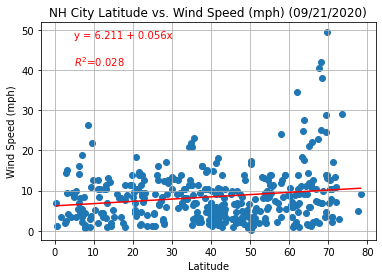

In [82]:
plt.title("NH City Latitude vs. Wind Speed (mph) (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(X,y)
plt.plot(wind_speed_range, predict_wind_speed_range, color="red")
plt.text(5,48, formula, color="red")
plt.text(5,41, r_squared_str, color="red")
plt.show

The data points here are quite spread out, and the R Squared value is low. This indicates that there is little to know correlation between latitude and wind speed. However, much like humidity, there are some data points that are of interest. You can see that there are a couple of cities located far to the north report far higher wind speeds than others in this group.

#### (Southern Hemisphere)

In [83]:
X = SH_df["Lat"].values
X_array = [[e] for e in X]
y = SH_df["Wind Speed"].values

In [84]:
model = LinearRegression()
model.fit(X_array, y)

LinearRegression()

In [85]:
slope = model.coef_[0]
slope

-0.03431161457891661

In [86]:
intercept = model.intercept_
intercept

8.229602075296285

In [87]:
r_squared = model.score(X_array, y)
r_squared

0.007484415930354427

In [88]:
def predict_function(wind_speed):
    return model.predict([[wind_speed]])[0]

In [89]:
wind_speed_range = np.arange(min(X), max(X), 0.001)
predict_wind_speed_range = [predict_function(e) for e in wind_speed_range]

In [90]:
# Variables used for creating text labels on plot
formula = f"y = {round(intercept, 3)} + {round(slope, 3)}x"
r_squared_str = f"$R^{2}$={round(r_squared, 3)}"

<function matplotlib.pyplot.show(close=None, block=None)>

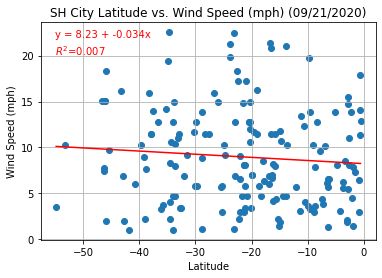

In [92]:
plt.title("SH City Latitude vs. Wind Speed (mph) (09/21/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(X,y)
plt.plot(wind_speed_range, predict_wind_speed_range, color="red")
plt.text(-55,22, formula, color="red")
plt.text(-55,20, r_squared_str, color="red")
plt.show

Although the R Squared value is very low, one can see a small trend. you can also see that like in the Northern Hemisphere there are some data anomalies that require further analysis.

# Part II : VacationPy
----


In [93]:
df.head(2)

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8,-68.30,50.00,57,75,3.56,AR,1600721730
1,Kutum,14.2,24.67,84.76,26,86,12.06,SD,1600721958


In [110]:
perfect_weather_df = df[
    (df["Max Temp"] <= 80)
    & (df["Max Temp"] >= 60)
    & (df["Wind Speed"] <= 20)
    & (df["Cloudiness"] <= 30)
]
perfect_weather_df.head(2)

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Albany,42.60,-73.97,63.0,24,0,1.61,US,1600721958
7,Ponta do Sol,32.67,-17.10,73.4,73,20,6.93,PT,1600721959


In [131]:
lat = perfect_weather_df["Lat"].tolist()
lon = perfect_weather_df["Lat"].tolist()
lat_lon = list(zip(lat, lon))

In [134]:
requests.get(
    "http://maps.googleapis.com/maps/api/place/nearbysearch/json",
    params={"key": g_key, "input": lat_lon[2], "radius": "5000"},
)

<Response [200]>

In [ ]:
r = requests.get("http://api.openweathermap.org/data/2.5/weather", params={
        "q": city_list[50],
        "appid": weather_api_key})